#### keras part - feature gathering

In [1]:
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
import numpy as np

Using TensorFlow backend.


This loads an image and resizes the image to (224, 224):

 img = image.load_img(img_path, target_size=(224, 224))
The img_to_array() function adds channels: x.shape = (224, 224, 3) for RGB and (224, 224, 1) for gray image

 x = image.img_to_array(img) 
expand_dims() is used to add the number of images: x.shape = (1, 224, 224, 3):

Input is a tensor with shape (number of images) x (image width) x (image height) x (image depth).

x = np.expand_dims(x, axis=0)
preprocess_input subtracts the mean RGB channels of the imagenet dataset. This is because the model you are using has been trained on a different dataset: x.shape is still (1, 224, 224, 3)

x = preprocess_input(x)
If you add x to an array images, at the end of the loop, you need to add images = np.vstack(images) so that you get (n, 224, 224, 3) as the dim of images where n is the number of images processed

In [63]:
model = InceptionResNetV2(weights='imagenet', include_top=True, classes=1000)
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 149, 149, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 149, 149, 32) 0           batch_normalization_204[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
batch_normalization_405 (BatchN (None, 8, 8, 224)    672         conv2d_405[0][0]                 
__________________________________________________________________________________________________
activation_405 (Activation)     (None, 8, 8, 224)    0           batch_normalization_405[0][0]    
__________________________________________________________________________________________________
conv2d_403 (Conv2D)             (None, 8, 8, 192)    399360      block8_9_ac[0][0]                
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, 8, 8, 256)    172032      activation_405[0][0]             
__________________________________________________________________________________________________
batch_normalization_403 (BatchN (None, 8, 8, 192)    576         conv2d_403[0][0]                 
__________

In [ ]:
img_path = '../images/tank1.jpg'
img = image.load_img(img_path, target_size=(299, 299))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

preds = model.predict(img_data)

print('Predicted:', decode_predictions(preds, top=3)[0])

In [64]:
import glob
files_list0 = glob.glob("../images/testset1/doc*")

In [65]:
for i in files_list0:
    img_path = i
    img = image.load_img(img_path, target_size=(299, 299))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    preds = model.predict(img_data)

    print('Predicted:',i," as:", decode_predictions(preds, top=4)[0],'\n')

Predicted: ../images/testset1\doc (1).png  as: [('n07565083', 'menu', 0.8633264), ('n02840245', 'binder', 0.048151597), ('n06359193', 'web_site', 0.02400824), ('n06785654', 'crossword_puzzle', 0.0025362368)] 

Predicted: ../images/testset1\doc (10).png  as: [('n07565083', 'menu', 0.6202245), ('n06359193', 'web_site', 0.160239), ('n06785654', 'crossword_puzzle', 0.029795699), ('n04554684', 'washer', 0.0041277767)] 

Predicted: ../images/testset1\doc (11).png  as: [('n06359193', 'web_site', 0.8962324), ('n07565083', 'menu', 0.01663762), ('n03782006', 'monitor', 0.0032110666), ('n02840245', 'binder', 0.0025946752)] 

Predicted: ../images/testset1\doc (12).png  as: [('n07565083', 'menu', 0.5456475), ('n06785654', 'crossword_puzzle', 0.20277451), ('n06359193', 'web_site', 0.010659189), ('n04238763', 'slide_rule', 0.008055822)] 

Predicted: ../images/testset1\doc (13).png  as: [('n06785654', 'crossword_puzzle', 0.813272), ('n06359193', 'web_site', 0.053904455), ('n07248320', 'book_jacket', 0

In [ ]:
https://medium.com/@franky07724_57962/using-keras-pre-trained-models-for-feature-extraction-in-image-clustering-a142c6cdf5b1

In [2]:
model = InceptionResNetV2(weights='imagenet', include_top=False, classes=1000)
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
________________________________________________________________________________

__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, None, None, 1 208896      block17_9_ac[0][0]               
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, None, None, 1 215040      activation_115[0][0]             
__________________________________________________________________________________________________
batch_normalization_113 (BatchN (None, None, None, 1 576         conv2d_113[0][0]                 
__________________________________________________________________________________________________
batch_normalization_116 (BatchN (None, None, None, 1 576         conv2d_116[0][0]                 
__________________________________________________________________________________________________
activation_113 (Activation)     (None, None, None, 1 0           batch_normalization_113[0][0]    
__________

In [53]:
import glob
files_list = glob.glob("../images/testset1/*.png")

In [54]:
files_list

['../images/testset1\\break (1).png',
 '../images/testset1\\break (10).png',
 '../images/testset1\\break (11).png',
 '../images/testset1\\break (12).png',
 '../images/testset1\\break (13).png',
 '../images/testset1\\break (14).png',
 '../images/testset1\\break (15).png',
 '../images/testset1\\break (16).png',
 '../images/testset1\\break (17).png',
 '../images/testset1\\break (18).png',
 '../images/testset1\\break (19).png',
 '../images/testset1\\break (2).png',
 '../images/testset1\\break (20).png',
 '../images/testset1\\break (21).png',
 '../images/testset1\\break (22).png',
 '../images/testset1\\break (23).png',
 '../images/testset1\\break (24).png',
 '../images/testset1\\break (25).png',
 '../images/testset1\\break (3).png',
 '../images/testset1\\break (4).png',
 '../images/testset1\\break (5).png',
 '../images/testset1\\break (6).png',
 '../images/testset1\\break (7).png',
 '../images/testset1\\break (8).png',
 '../images/testset1\\break (9).png',
 '../images/testset1\\doc (1).png'

In [55]:
feature_list = list()
for i in files_list:
    img_path = i
    img = image.load_img(img_path, target_size=(299, 299))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    preds_features = np.array(model.predict(img_data))
    feature_list.append(preds_features.flatten())

In [56]:
from sklearn import cluster
feature_list_np = np.array(feature_list)
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(feature_list_np)

In [80]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [13]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline

In [14]:
df = pd.DataFrame(feature_list)

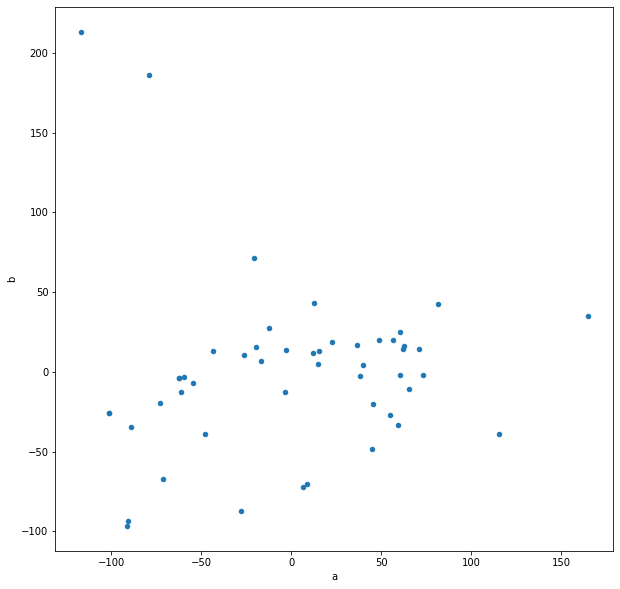

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
df_pca = pd.DataFrame(principalComponents,columns=["a","b"])
df_pca.plot.scatter("a","b",figsize=(10,10))

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10


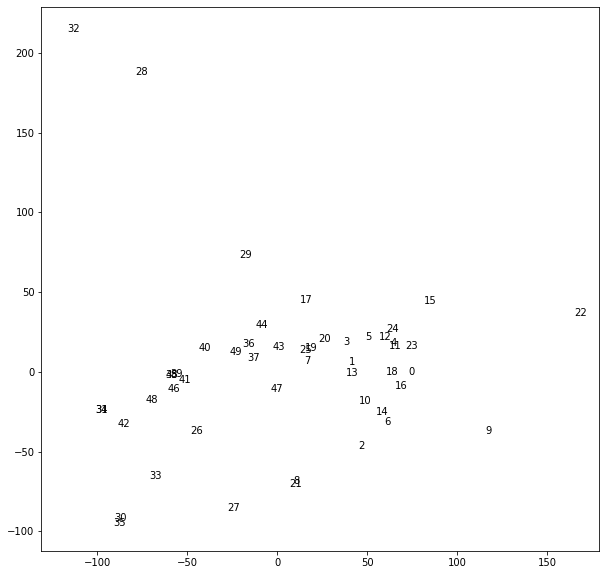

In [17]:
from matplotlib import pyplot as plt
matrix = df_pca.values

plt.plot(matrix[:,0],matrix[:,1], 'ro', alpha = 0)
for i in range(matrix.shape[0]):
    plt.text(matrix[i,0], matrix[i,1], str(i))

plt.show()

In [18]:
for i,j in enumerate(files_list):
    print(i,j)

0 ../images/testset1\break (1).png
1 ../images/testset1\break (10).png
2 ../images/testset1\break (11).png
3 ../images/testset1\break (12).png
4 ../images/testset1\break (13).png
5 ../images/testset1\break (14).png
6 ../images/testset1\break (15).png
7 ../images/testset1\break (16).png
8 ../images/testset1\break (17).png
9 ../images/testset1\break (18).png
10 ../images/testset1\break (19).png
11 ../images/testset1\break (2).png
12 ../images/testset1\break (20).png
13 ../images/testset1\break (21).png
14 ../images/testset1\break (22).png
15 ../images/testset1\break (23).png
16 ../images/testset1\break (24).png
17 ../images/testset1\break (25).png
18 ../images/testset1\break (3).png
19 ../images/testset1\break (4).png
20 ../images/testset1\break (5).png
21 ../images/testset1\break (6).png
22 ../images/testset1\break (7).png
23 ../images/testset1\break (8).png
24 ../images/testset1\break (9).png
25 ../images/testset1\roentgen (1).png
26 ../images/testset1\roentgen (10).png
27 ../images/te

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

feature_list_np = np.array(feature_list)
kmeans = KMeans(n_clusters=3, random_state=0).fit(feature_list_np)

In [23]:
for i,j in enumerate(zip(files_list,kmeans.labels_)):
    print(i,j)

0 ('../images/testset1\\break (1).png', 0)
1 ('../images/testset1\\break (10).png', 0)
2 ('../images/testset1\\break (11).png', 0)
3 ('../images/testset1\\break (12).png', 0)
4 ('../images/testset1\\break (13).png', 0)
5 ('../images/testset1\\break (14).png', 0)
6 ('../images/testset1\\break (15).png', 0)
7 ('../images/testset1\\break (16).png', 0)
8 ('../images/testset1\\break (17).png', 0)
9 ('../images/testset1\\break (18).png', 0)
10 ('../images/testset1\\break (19).png', 0)
11 ('../images/testset1\\break (2).png', 0)
12 ('../images/testset1\\break (20).png', 0)
13 ('../images/testset1\\break (21).png', 0)
14 ('../images/testset1\\break (22).png', 0)
15 ('../images/testset1\\break (23).png', 0)
16 ('../images/testset1\\break (24).png', 0)
17 ('../images/testset1\\break (25).png', 0)
18 ('../images/testset1\\break (3).png', 0)
19 ('../images/testset1\\break (4).png', 0)
20 ('../images/testset1\\break (5).png', 0)
21 ('../images/testset1\\break (6).png', 1)
22 ('../images/testset1\\b

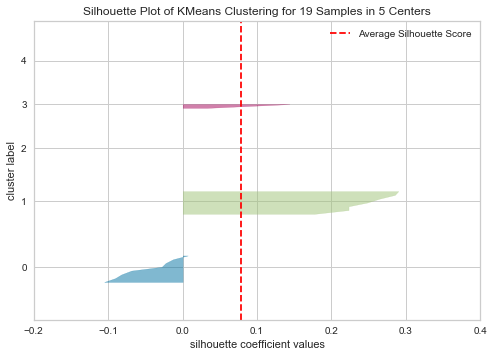

In [117]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = cluster.KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(feature_list_np)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [134]:
dbscan = DBSCAN(eps=225, min_samples=2).fit(feature_list_np)

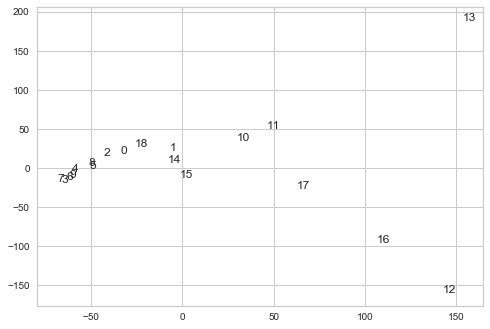

In [136]:
from matplotlib import pyplot as plt
matrix = df_pca.values

plt.plot(matrix[:,0],matrix[:,1], 'ro', alpha = 0)
for i in range(matrix.shape[0]):
    plt.text(matrix[i,0], matrix[i,1], str(i))

plt.show()

In [146]:
for i,j in enumerate(zip(files_list,kmeans.labels_)):
    print(i,j)

0 ('../images/testset1\\car.jpg', 0)
1 ('../images/testset1\\car1.jpg', 0)
2 ('../images/testset1\\car3.jpg', 0)
3 ('../images/testset1\\recepta.jpg', 1)
4 ('../images/testset1\\recepta1.jpg', 1)
5 ('../images/testset1\\recepta2.jpg', 1)
6 ('../images/testset1\\recepta3.jpg', 1)
7 ('../images/testset1\\recepta4.jpg', 1)
8 ('../images/testset1\\recepta5.jpg', 1)
9 ('../images/testset1\\recepta6.jpg', 1)
10 ('../images/testset1\\rentgen1.jpg', 0)
11 ('../images/testset1\\rentgen2.jpg', 0)
12 ('../images/testset1\\rentgen3.jpg', 3)
13 ('../images/testset1\\rentgen4.jpg', 2)
14 ('../images/testset1\\rentgen5.jpg', 0)
15 ('../images/testset1\\rentgen6.jpg', 0)
16 ('../images/testset1\\rentgen7.jpg', 3)
17 ('../images/testset1\\rentgen8.jpg', 4)
18 ('../images/testset1\\tshirt1.jpg', 0)


In [70]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
X = feature_list_np.copy()
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [71]:
distances

array([[  0.        , 227.67700411],
       [  0.        , 275.77065576],
       [  0.        , 302.08465423],
       [  0.        , 218.505765  ],
       [  0.        , 262.02230631],
       [  0.        , 234.9512851 ],
       [  0.        , 213.18030906],
       [  0.        , 252.18576288],
       [  0.        , 315.10667266],
       [  0.        , 283.84400214],
       [  0.        , 178.07716588],
       [  0.        , 224.37147928],
       [  0.        , 291.14901519],
       [  0.        , 159.00734434],
       [  0.        , 235.22980166],
       [  0.        , 238.43689644],
       [  0.        , 203.03565   ],
       [  0.        , 235.45440855],
       [  0.        , 276.9354981 ],
       [  0.        , 218.505765  ],
       [  0.        , 243.26198594],
       [  0.        , 255.23488532],
       [  0.        , 339.84292049],
       [  0.        , 252.29016774],
       [  0.        , 262.95386009],
       [  0.        , 109.35022955],
       [  0.        , 127.03218047],
 

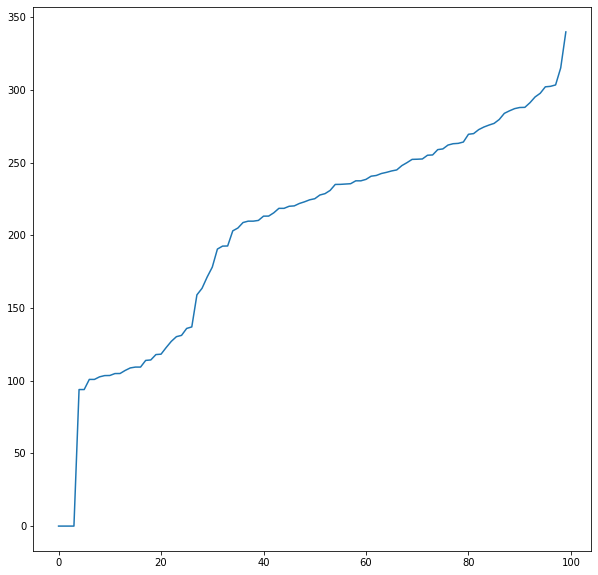

In [72]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [73]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [74]:
X = df_pca.values.copy()
kmeans = KMeans(n_clusters=3, random_state=0).fit(feature_list_np)
clusters = kmeans.labels_

ValueError: 'c' argument has 100 elements, which is not acceptable for use with 'x' with size 50, 'y' with size 50.

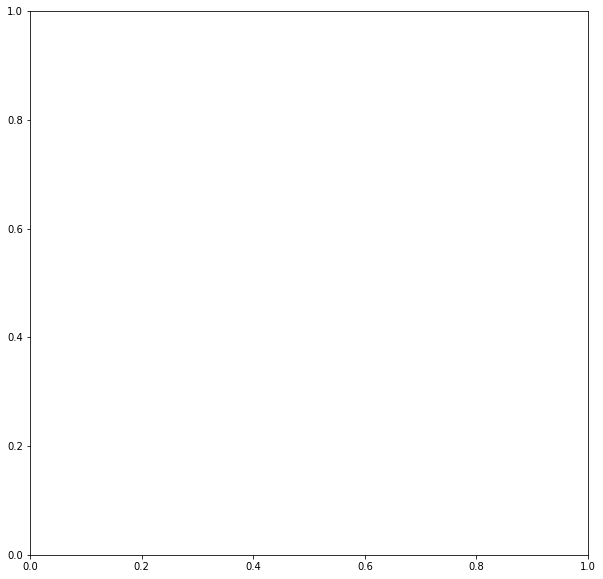

In [75]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters),s=10)

for i in range(X.shape[0]):
#     if (i<25):
#         k = "B"
#     else:
#         k = "R"
    plt.text(X[i,0], X[i,1], str(k))

plt.show()

In [69]:
for i,j in enumerate(zip(files_list,kmeans.labels_)):
    print(i,j)

0 ('../images/testset1\\break (1).png', 2)
1 ('../images/testset1\\break (10).png', 1)
2 ('../images/testset1\\break (11).png', 2)
3 ('../images/testset1\\break (12).png', 2)
4 ('../images/testset1\\break (13).png', 2)
5 ('../images/testset1\\break (14).png', 2)
6 ('../images/testset1\\break (15).png', 2)
7 ('../images/testset1\\break (16).png', 2)
8 ('../images/testset1\\break (17).png', 2)
9 ('../images/testset1\\break (18).png', 2)
10 ('../images/testset1\\break (19).png', 2)
11 ('../images/testset1\\break (2).png', 2)
12 ('../images/testset1\\break (20).png', 2)
13 ('../images/testset1\\break (21).png', 2)
14 ('../images/testset1\\break (22).png', 2)
15 ('../images/testset1\\break (23).png', 2)
16 ('../images/testset1\\break (24).png', 2)
17 ('../images/testset1\\break (25).png', 2)
18 ('../images/testset1\\break (3).png', 2)
19 ('../images/testset1\\break (4).png', 2)
20 ('../images/testset1\\break (5).png', 2)
21 ('../images/testset1\\break (6).png', 2)
22 ('../images/testset1\\b